In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Target']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

In [5]:
dataset.head(5)

,sepal-length,sepal-width,petal-length,petal-width,Target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
X = dataset.loc[:, 'sepal-length':'petal-width' ]
y = dataset.iloc[:, 4]

In [9]:
X.columns

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width'], dtype='object')

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
y_pred = classifier.predict(X_test)
train_pred = classifier.predict(X_train)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print("Train Accuracy:",accuracy_score(y_train, train_pred)*100)
print("Test Accuracy:",accuracy_score(y_test, y_pred)*100)

[[ 9  0  0]
 [ 0 12  1]
 [ 0  2  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.86      0.92      0.89        13
 Iris-virginica       0.86      0.75      0.80         8

    avg / total       0.90      0.90      0.90        30

Train Accuracy: 96.66666666666667
Test Accuracy: 90.0


__Testing with Different K-Values__

In [28]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

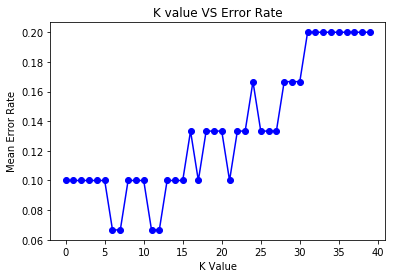

In [29]:
plt.plot(error,color='blue',marker='o')
plt.xlabel('K Value')
plt.ylabel('Mean Error Rate')
plt.title('K value VS Error Rate')
plt.show()